In [6]:
import pandas as pd
import shap
import xgboost
import sklearn
import time
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl
shap.initjs()

ModuleNotFoundError: No module named 'shap'

In [7]:
!pip install shap


  Using cached https://files.pythonhosted.org/packages/d2/17/37ee6c79cafbd9bb7423b54e55ea90beec66aa7638664d607bcc28de0bae/shap-0.36.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/a0/25/118cfd7d323abf3e353710e2ff7fe12b1470c302103ad9675cd794f2988e/numba-0.51.1.tar.gz
  ERROR: Complete output from command /snap/jupyter/6/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-qawo2ax1/shap/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-vwi5lxtk --python-tag cp37:
  ERROR: running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/shap
  copying shap/datasets.py -> build/lib.linux-x86_64-3.7/shap
  copying shap/links.py -> build/lib.linux-x86_64-3.7/shap
  copying shap/_explanation.py -> build/lib.linux-x86_64

  ERROR: Complete output from command /snap/jupyter/6/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-qawo2ax1/numba/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-gtjlwlxt --python-tag cp37:
  ERROR: TBB not found
  Using OpenMP from: True
  running bdist_wheel
  running build
  got version from file /tmp/pip-install-qawo2ax1/numba/numba/_version.py {'version': '0.51.1', 'full': 'c5f8505fb296ae3fc3867e1e257f28ea3423991a'}
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/numba
  copying numba/runtests.py -> build/lib.linux-x86_64-3.7/numba
  copying numba/extending.py -> build/lib.linux-x86_64-3.7/numba
  copying numba/_version.py -> build/lib.linux-x86_64-3.7/numba
  copying numba/__init__.py -> build/lib.linux-x86_64-3.7/numba
  copying n

Failed to build shap numba
  Running setup.py install for numba ... error
    ERROR: Complete output from command /snap/jupyter/6/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-qawo2ax1/numba/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-ke44iwc0/install-record.txt --single-version-externally-managed --compile --user --prefix=:
    ERROR: TBB not found
    Using OpenMP from: True
    running install
    running build
    got version from file /tmp/pip-install-qawo2ax1/numba/numba/_version.py {'version': '0.51.1', 'full': 'c5f8505fb296ae3fc3867e1e257f28ea3423991a'}
    running build_py
    creating build
    creating build/lib.linux-x86_64-3.7
    creating build/lib.linux-x86_64-3.7/numba
    copying numba/runtests.py -> build/lib.linux-x86_64-3.7/numba
    copying numba/extending.py -> build/lib.l

ERROR: Command "/snap/jupyter/6/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-qawo2ax1/numba/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-ke44iwc0/install-record.txt --single-version-externally-managed --compile --user --prefix=" failed with error code 1 in /tmp/pip-install-qawo2ax1/numba/


In [173]:
data = pd.read_csv('titanic_data.csv')

In [174]:
data.sample(7)

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
557,557,0,1,1,1,0,0,3,2,1
64,64,0,1,1,1,0,0,2,2,1
690,690,1,1,1,1,1,0,3,1,1
297,297,0,1,0,0,1,2,3,1,2
550,550,1,1,1,1,0,2,3,2,1
520,520,1,1,0,1,0,0,3,1,2
871,871,1,1,0,2,1,1,3,1,3


# SHAP With GBM Model

In [175]:
X = data.drop(['Survived','Unnamed: 0'],axis=1)
Y = data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25)


In [176]:
#import GBM library
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [177]:
gbm_model = GradientBoostingClassifier(learning_rate= 0.1,max_depth=12,min_samples_leaf=5,n_estimators=100)
gbm_model = gbm_model.fit(X_train,Y_train)

In [178]:
gbm_accuracy = round(gbm_model.score(X_train, Y_train) * 100, 2)
gbm_accuracy

89.97

In [179]:
#creta gbm shap model and shap values 
gbm_explainer = shap.TreeExplainer(gbm_model)
gbm_shap_values = gbm_explainer.shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [180]:
#model visualization with force_plot

shap.force_plot(gbm_explainer.expected_value, gbm_shap_values[1,:], X_test.iloc[10,:])

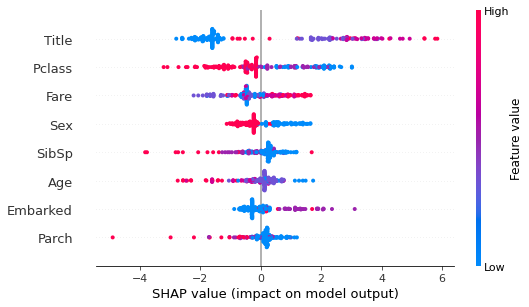

In [181]:
shap.summary_plot(gbm_shap_values, X_test)

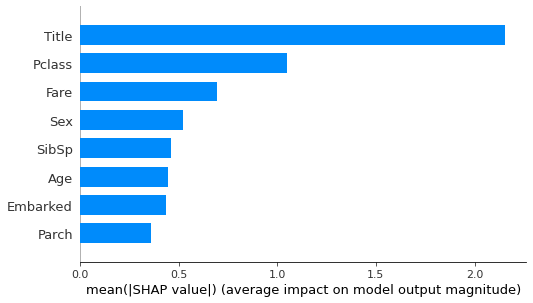

In [182]:
shap.summary_plot(gbm_shap_values,X_test,  plot_type="bar")

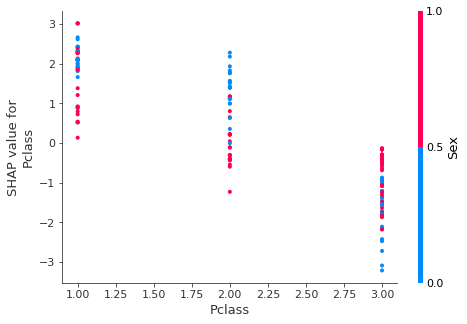

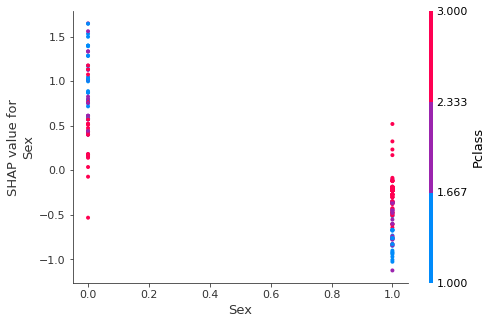

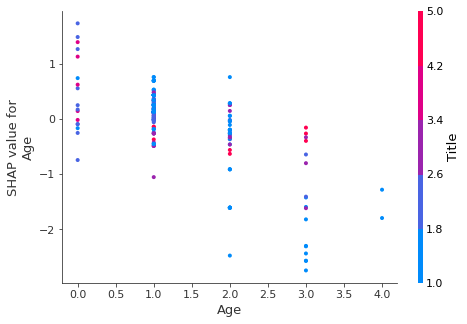

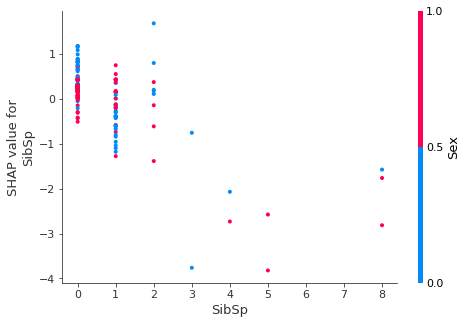

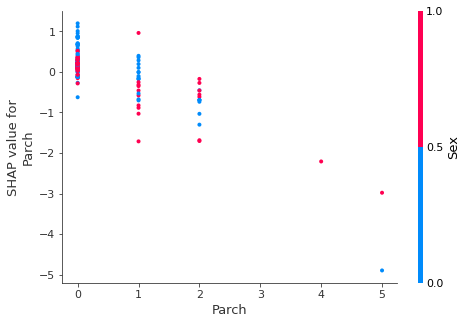

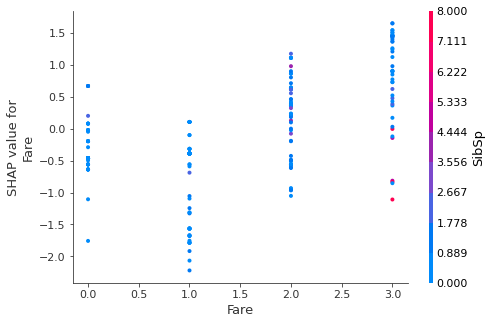

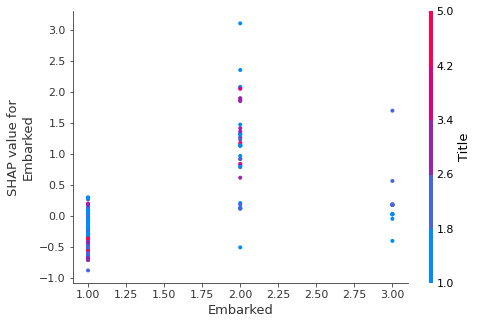

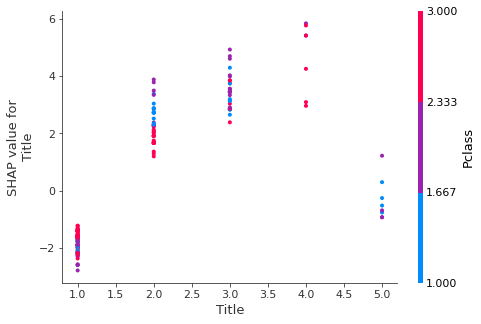

In [183]:
for column in X_test.columns:
    shap.dependence_plot(column, gbm_shap_values, X_test,)

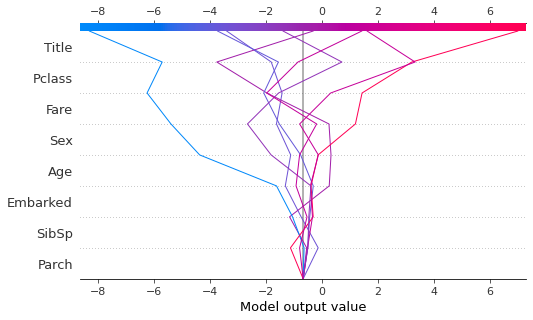

In [184]:
shap.decision_plot(gbm_explainer.expected_value, gbm_shap_values[:8:], X.iloc[0,:])

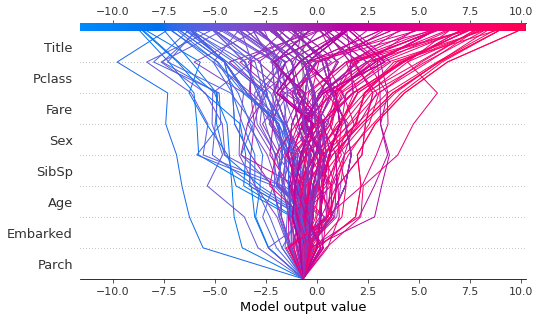

In [185]:
shap.decision_plot(gbm_explainer.expected_value, gbm_shap_values[::], X.iloc[0,:])

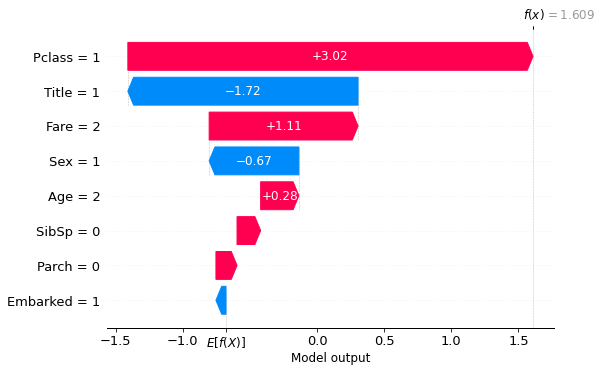

In [186]:
shap.waterfall_plot(gbm_explainer.expected_value, gbm_shap_values[5,:], X_test.iloc[5,:])  

In [187]:
shap.image_plot(gbm_explainer.expected_value, gbm_shap_values[1][0,:], X_test.iloc[5,:])

IndexError: too many indices for array

# SHAP With XGBoostModel

In [196]:
from xgboost import XGBClassifier 
xgb_model = XGBClassifier(learning_rate= 0.5,max_depth=9,min_samples_leaf=5,n_estimators=1000)
xgb_model.fit(X_train,Y_train)

xgm_accuracy = round(xgb_model.score(X_train, Y_train) * 100, 2)
xgm_accuracy

89.97

In [197]:
xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [198]:
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[1,:], X_test.iloc[10,:])

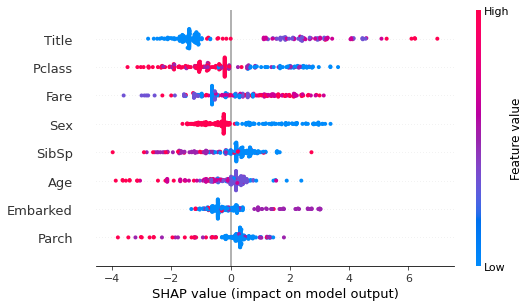

In [199]:
shap.summary_plot(xgb_shap_values, X_test)

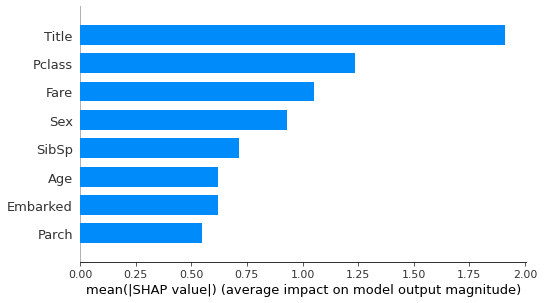

In [200]:
shap.summary_plot(xgb_shap_values,X_test,  plot_type="bar")

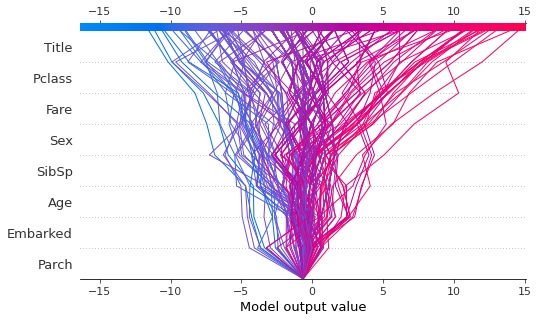

In [201]:
shap.decision_plot(xgb_explainer.expected_value, xgb_shap_values[::], X.iloc[0,:])

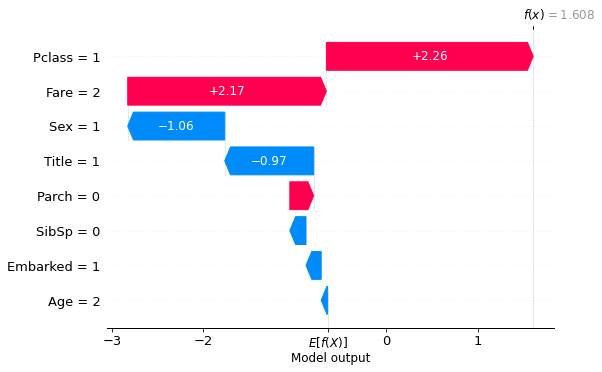

In [202]:
shap.waterfall_plot(xgb_explainer.expected_value, xgb_shap_values[5,:], X_test.iloc[5,:])  

# SHAP With lightGBM Model

In [203]:
from lightgbm import LGBMClassifier

In [204]:
lgbm_model = LGBMClassifier(iterations=300, learning_rate=0.1, random_seed=123)
lgbm_model.fit(X, Y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', iterations=300, learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_seed=123, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [205]:
lgbm_explainer = shap.TreeExplainer(lgbm_model)
lgbm_shap_values = lgbm_explainer.shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [206]:
shap.force_plot(lgbm_explainer.expected_value[1], lgbm_shap_values[1][0,:])

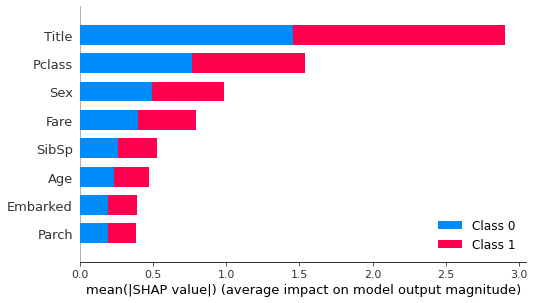

In [207]:
shap.summary_plot(lgbm_shap_values, X_test)

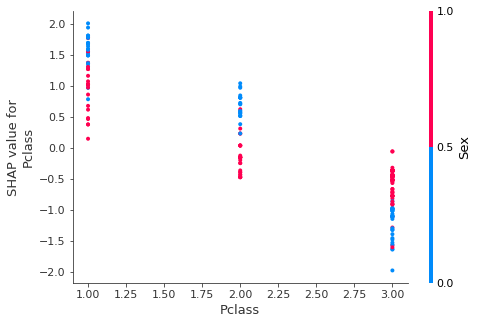

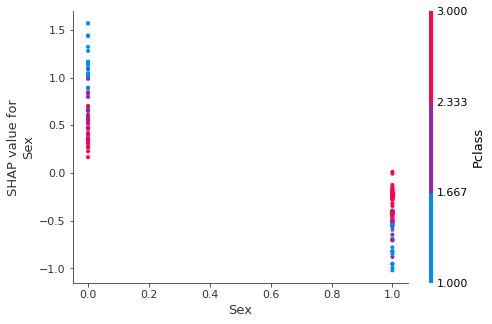

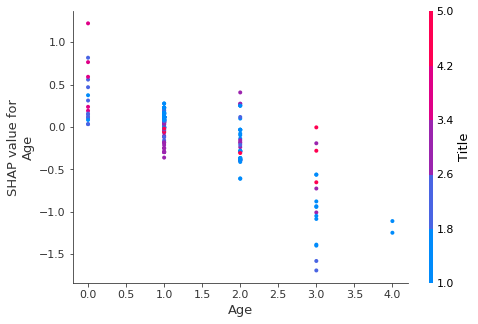

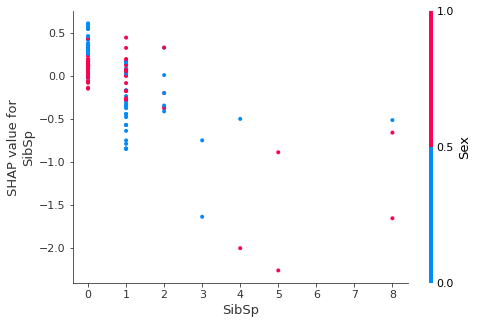

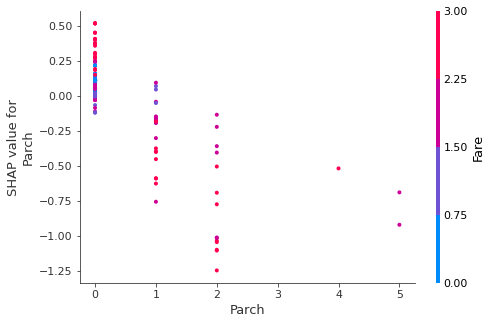

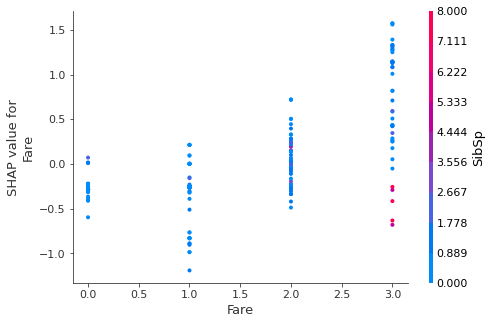

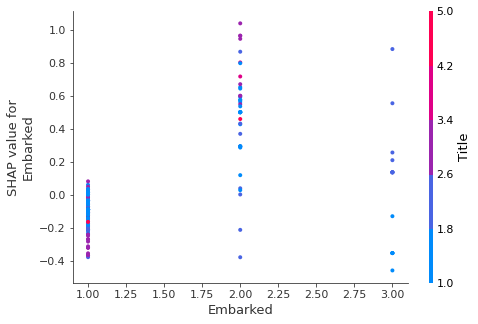

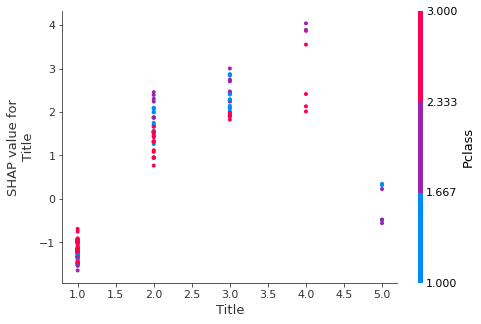

In [208]:
for column in X_test.columns:
    shap.dependence_plot(column, lgbm_shap_values[1], X_test,)

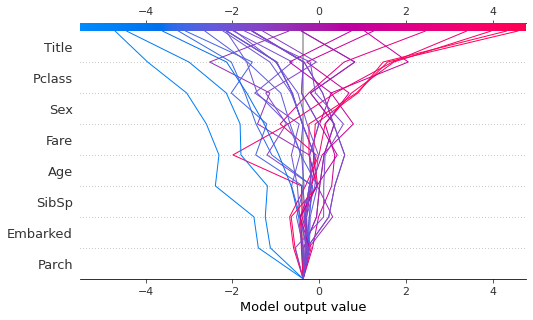

In [209]:
shap.decision_plot(lgbm_explainer.expected_value[1], lgbm_shap_values[1][:30:], X.iloc[0,:])

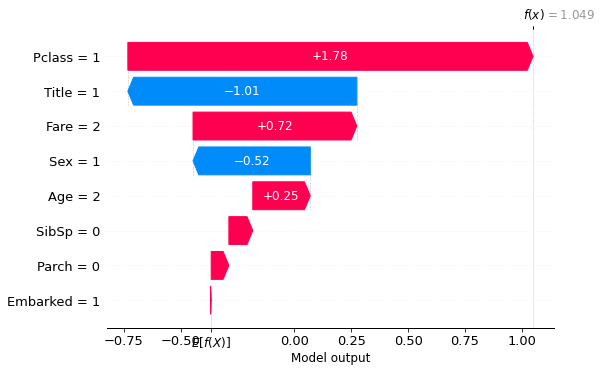

In [210]:
shap.waterfall_plot(lgbm_explainer.expected_value[1], lgbm_shap_values[1][5,:], X_test.iloc[5,:])

In [211]:
print('ligtGBM :',lgbm_explainer.expected_value)

ligtGBM : [0.3682038148201992, -0.3682038148201992]


In [212]:
print('XGBM :',gbm_explainer.expected_value)

XGBM : -0.6786767573089193


# SHAP With CatBoost Model

In [213]:
from catboost import CatBoostClassifier

In [214]:
catBoost_model = CatBoostClassifier(learning_rate=0.03,max_depth=12,n_estimators=1000)
catBoost_model.fit(X, Y, verbose=False, plot=False)

In [215]:
cboost_explainer = shap.TreeExplainer(catBoost_model)
cboost_shap_values = lgbm_explainer.shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [216]:
shap.force_plot(cboost_explainer.expected_value, cboost_shap_values[1][5,:], X_test.iloc[0,:])

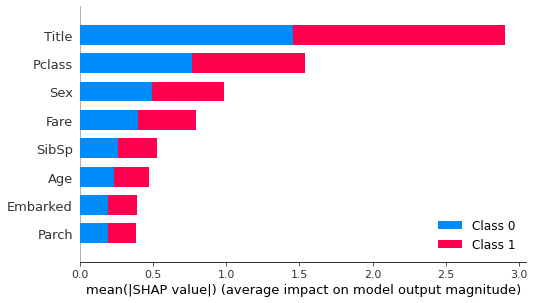

In [217]:
shap.summary_plot(cboost_shap_values, X_test)

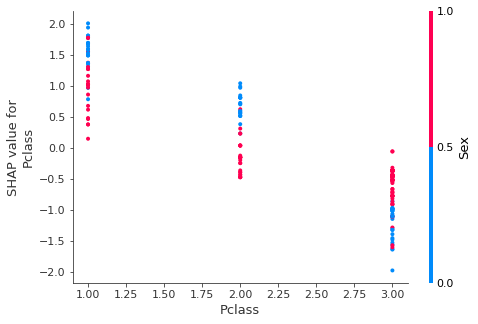

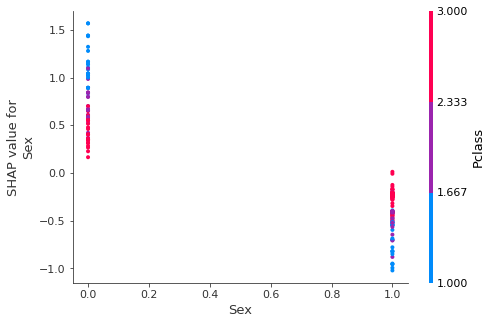

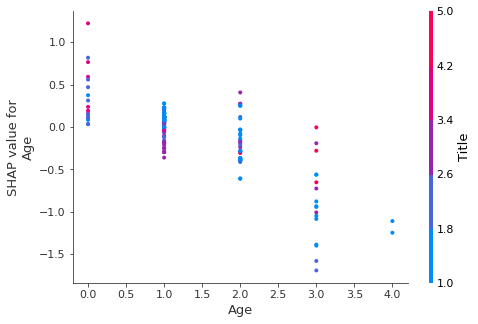

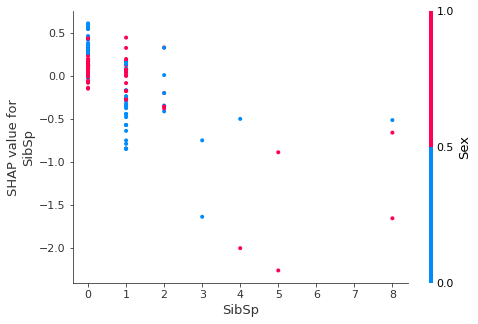

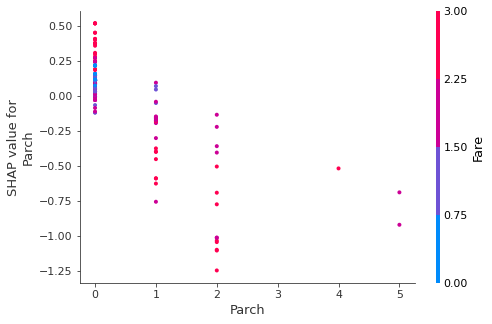

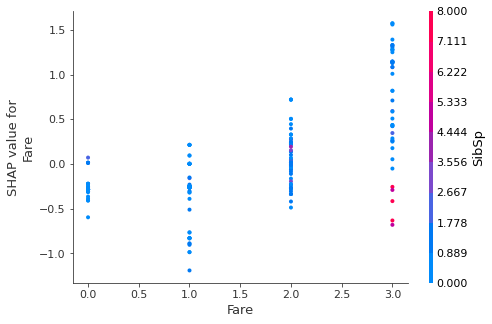

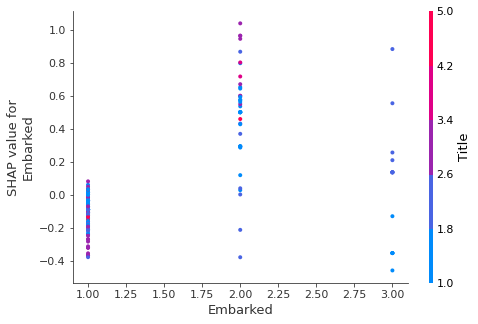

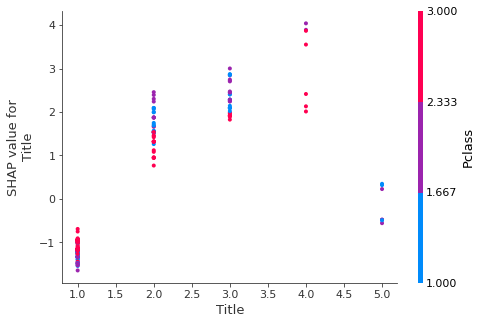

In [218]:
for column in X_test.columns:
    shap.dependence_plot(column, cboost_shap_values[1], X_test,)

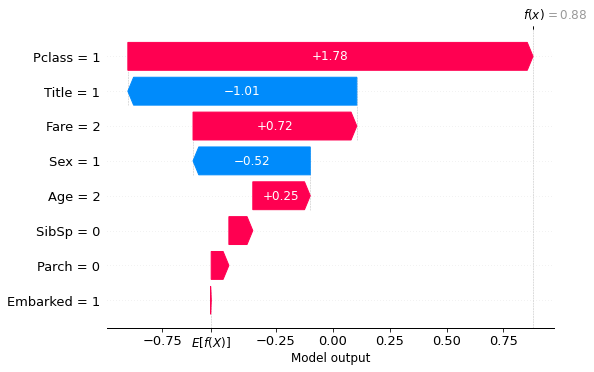

In [219]:
shap.waterfall_plot(cboost_explainer.expected_value, cboost_shap_values[1][5,:], X_test.iloc[5,:])